In [94]:
#Варіант 4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [73]:
#Завдання 1: Завантажте файл Housing.csv. Виведіть перші 5 рядків.
data = pd.read_csv('D:/Учеба/Машинне Навчання/Lab4/Housing.csv',  encoding = "ISO-8859-1")
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [74]:
#Завдання 2: Зробіть новий датасет, який містить тільки ці стовпчики.
columns = ['price', 'area', 'bedrooms', 'bathrooms']
dset = data[columns].copy()
dset.head(5)

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1


In [75]:
#Завдання 3: Проведіть попередній аналіз даних: вивчіть структуру даних, перевірте наявність відсутніх значень та інші особливості даних.
#Зробити це  по аналогії з попередніми роботами 
#(визначити тип даних, перевірити наявність “-“, замінити на Nan, потім змінити тип даних на float, потім на середнє значення за стовпчиком.)
print(dset.shape)

print("Пропусків у price: ", sum(dset['price'].isnull()))
print("Пропусків у area: ", sum(dset['area'].isnull()))
print("Пропусків у bedrooms: ", sum(dset['bedrooms'].isnull()))
print("Пропусків у bathrooms: ", sum(dset['bathrooms'].isnull()))

dset = dset.replace("—", np.nan)
dset = dset.astype(float)
dset = dset[:-1]

(545, 4)
Пропусків у price:  0
Пропусків у area:  0
Пропусків у bedrooms:  0
Пропусків у bathrooms:  0


In [76]:
#Завдання 4: Нормалізуйте дані перед подальшим використанням. 
#Це може покращити швидкість навчання моделі та поліпшити її стабільність. 
#Дані для лінійної регресії нормалізуються так, щоб їх середнє значення було близьким до 0, 
#а стандартне відхилення - близьким до 1.
scaler = MinMaxScaler()
dset[columns] = scaler.fit_transform(dset[columns])
dset.head(5)

,price,area,bedrooms,bathrooms
0,1.000000,0.396564,0.6,0.333333
1,0.909091,0.502405,0.6,1.000000
2,0.909091,0.571134,0.4,0.333333
3,0.906061,0.402062,0.6,0.333333
4,0.836364,0.396564,0.6,0.000000


In [77]:
#Завдання 5: Розділіть дані на навчальний та тестовий набори для подальшого оцінювання моделі.
train = dset.sample(frac = 0.8, random_state=42)
test = dset.drop(train.index)

In [78]:
#Завдання 6: Підготуйте дані
#виберіть атрибути (площа, кількість ванних кімнат, кількість спалень) та цільову змінну (ціну на будинок).
trainTargetVar = train['price']
trainAtr = train[['area', 'bedrooms', 'bathrooms']]
testTargetVar = test["price"]
testAtr = test[['area', 'bedrooms', 'bathrooms']]

In [79]:
#Завдання 7: Побудуйте модель лінійної регресії та навчіть її на навчальних даних.
lrModel = LinearRegression()
lrModel.fit(trainAtr, trainTargetVar)
modelScore = lrModel.score(testAtr, testTargetVar)
print(modelScore)

0.5314491714135845


In [90]:
#Завдання 8: Оцініть якість моделі на тестових даних, використовуючи показники, 
#такі як середньоквадратична помилка (RMSE) та коефіцієнт детермінації ().
#Потім застосуйте  крос-валідацію для підвищення якості моделі. 
#Порівняйте результати (без крос-валідації і з крос-валідацією).
R2 = r2_score(trainTargetVar, lrModel.predict(trainAtr))
print(R2)
y_pred = lrModel.predict(trainAtr)
RMSE = mean_squared_error(y_true=trainTargetVar, y_pred=y_pred, squared=False)
print(RMSE)

0.4752117247015405
0.11766552977382694


In [91]:
#Завдання 9: Виконайте аналіз результатів та виведіть прогнозовані ціни на будинки для тестового набору даних.
targetPredict = lrModel.predict(testAtr)
print(targetPredict)

[0.73317467 0.32473286 0.4272241  0.1989358  0.40652615 0.35079249
 0.27049618 0.40495749 0.41567175 0.41567175 0.40495749 0.34218599
 0.36946236 0.45886845 0.40495749 0.25284676 0.18738346 0.29809345
 0.24141902 0.28834189 0.35341744 0.20471198 0.38730807 0.29234937
 0.21433893 0.28493661 0.28172763 0.29508076 0.25605574 0.3106085
 0.18224908 0.25605574 0.13841059 0.33968565 0.40366907 0.19171559
 0.26247371 0.1565772  0.32216567 0.16440337 0.25413035 0.28050821
 0.11691039 0.18096549 0.14213676 0.17101763 0.3767136  0.22890398
 0.18764017 0.18205279 0.18545806 0.32132758 0.20811725 0.16600786
 0.22890398 0.13491654 0.19120215 0.20471198 0.21562253 0.19014318
 0.24444297 0.2950139  0.20451569 0.19207232 0.32132758 0.15477641
 0.2812511  0.3144641  0.15573911 0.12496869 0.13455981 0.17583111
 0.13982254 0.14129868 0.16235337 0.17326392 0.14161957 0.19636862
 0.24341609 0.36516125 0.12701869 0.23949845 0.25496844 0.12914037
 0.10503714 0.15445552 0.1989358  0.10002737 0.12329627 0.20471

In [92]:
#Завдання 10: Візуалізуйте дані та результати регресії: 

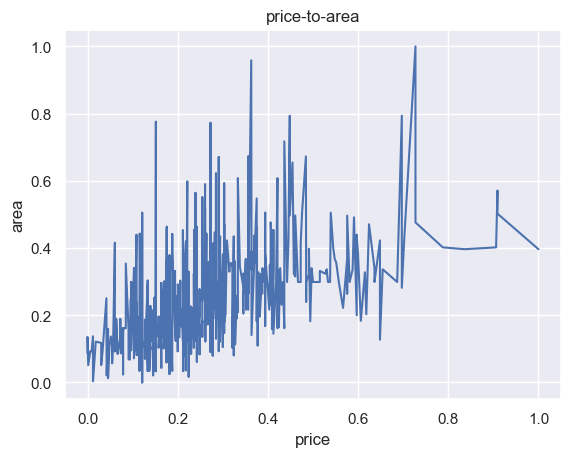

In [108]:
#побудуйте графіки для ознайомлення з розподілом даних
plt.plot(dset['price'], dset['area'])
plt.xlabel('price')
plt.ylabel('area')
plt.title("price-to-area")
plt.show()

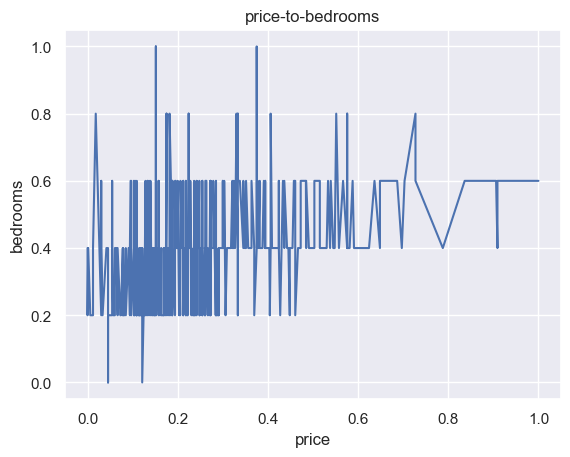

In [109]:
plt.plot(dset['price'], dset['bedrooms'])
plt.xlabel('price')
plt.ylabel('bedrooms')
plt.title("price-to-bedrooms")
plt.show()

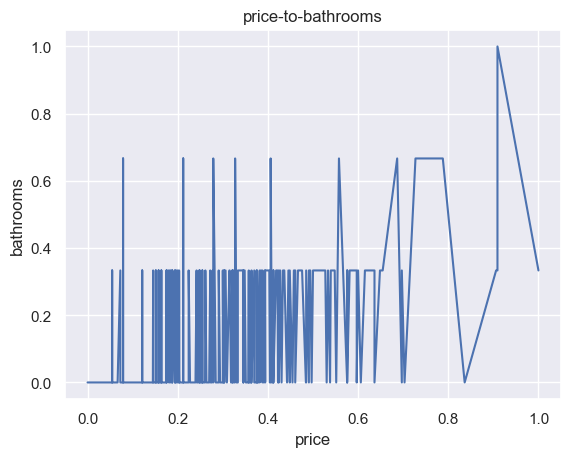

In [110]:
plt.plot(dset['price'], dset['bathrooms'])
plt.xlabel('price')
plt.ylabel('bathrooms')
plt.title("price-to-bathrooms")
plt.show()

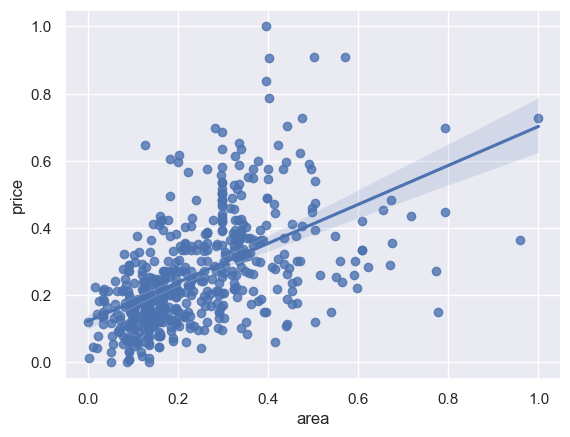

In [106]:
#і лінійною регресійною моделлю.
sns.set_theme(color_codes=True)
sns.regplot(x="area", y="price", data=dset);

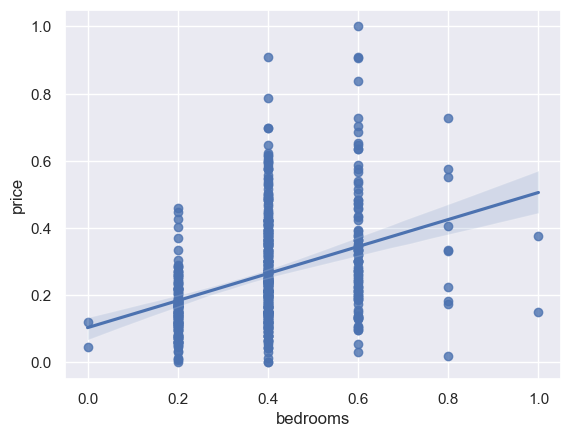

In [105]:
sns.set_theme(color_codes=True)
sns.regplot(x="bedrooms", y="price", data=dset);

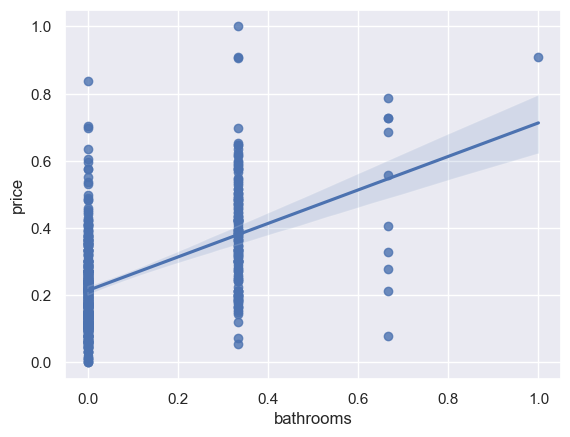

In [104]:
sns.set_theme(color_codes=True)
sns.regplot(x="bathrooms", y="price", data=dset);

In [ ]:
#Висновки: лінійна регрессія дозволяє ефективно прогнозувати цільові значення за допомогою атрибутів, базуюючись на таблиці з вибіркою даних.
#Точність вибірки може бути нижчою за ідеальну, втім це компенсується швидкістю в порівнянні з аналітичними розрахунками регресії
#seaborn дозволяє швидко візуалізувати регресію